In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv("steam.csv")

games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

# Data Exploration and Filtering

1. Only english games
2. platform containing windows
3. games cheaper than $100

In [12]:
games['english'].value_counts()

english
1    26564
0      511
Name: count, dtype: int64

<Axes: ylabel='count'>

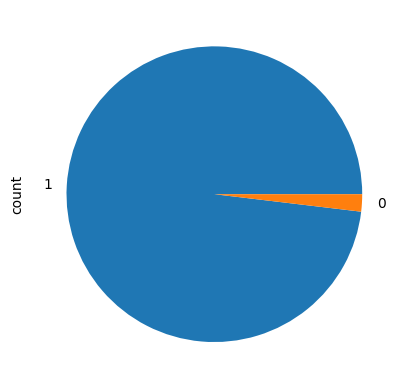

In [16]:
games['english'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Percentage of English vs. Non-English Games')

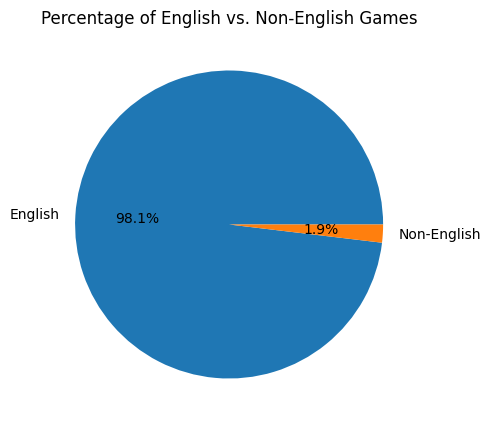

In [27]:
english_labels = ['English', 'Non-English']
english_data = games['english'].value_counts(normalize=True).values

fig, ax = plt.subplots(figsize=(10,5))
ax.pie(english_data, labels=english_labels, autopct='%1.1f%%')

ax.set_title('Percentage of English vs. Non-English Games')

In [28]:
# Filtering 1: only enlgish games
games = games.loc[games['english'] == 1]
games.shape()

<class 'pandas.core.frame.DataFrame'>
Index: 26564 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             26564 non-null  int64  
 1   name              26564 non-null  object 
 2   release_date      26564 non-null  object 
 3   english           26564 non-null  int64  
 4   developer         26563 non-null  object 
 5   publisher         26550 non-null  object 
 6   platforms         26564 non-null  object 
 7   required_age      26564 non-null  int64  
 8   categories        26564 non-null  object 
 9   genres            26564 non-null  object 
 10  steamspy_tags     26564 non-null  object 
 11  achievements      26564 non-null  int64  
 12  positive_ratings  26564 non-null  int64  
 13  negative_ratings  26564 non-null  int64  
 14  average_playtime  26564 non-null  int64  
 15  median_playtime   26564 non-null  int64  
 16  owners            26564 non-null  object 
 17

In [29]:
games['platforms'].value_counts()

platforms
windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
mac                      3
mac;linux                1
linux                    1
Name: count, dtype: int64

In [131]:
# Filtering 2: platforms containing windows
games = games[games['platforms'].str.contains('windows')]
games['platforms'].value_counts()

platforms
windows              17938
windows;mac;linux     4607
windows;mac           3406
windows;linux          608
Name: count, dtype: int64

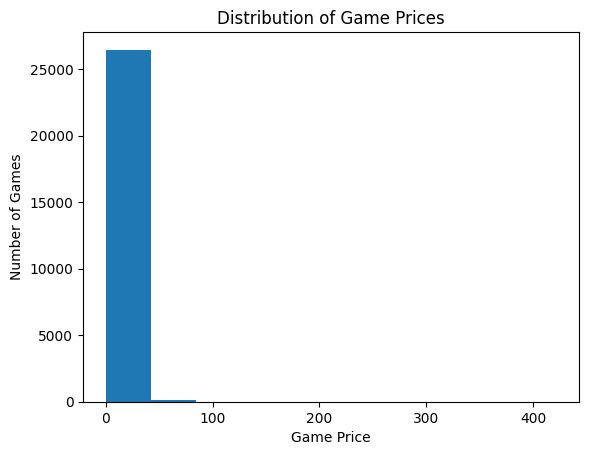

In [132]:
plt.hist(games['price'])
plt.title('Distribution of Game Prices')
plt.xlabel('Game Price')
plt.ylabel('Number of Games')
plt.show()

In [133]:
# Filtering 3: remove free games
games['price'].value_counts(normalize=True).sort_values(ascending=False)

price
3.99     0.119922
0.79     0.105840
0.00     0.092812
6.99     0.076998
7.19     0.048533
           ...   
0.85     0.000038
49.90    0.000038
3.02     0.000038
3.14     0.000038
6.10     0.000038
Name: proportion, Length: 278, dtype: float64

In [134]:
games = games.loc[games['price'] <= 100]
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26548 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             26548 non-null  int64  
 1   name              26548 non-null  object 
 2   release_date      26548 non-null  object 
 3   english           26548 non-null  int64  
 4   developer         26547 non-null  object 
 5   publisher         26534 non-null  object 
 6   platforms         26548 non-null  object 
 7   required_age      26548 non-null  int64  
 8   categories        26548 non-null  object 
 9   genres            26548 non-null  object 
 10  steamspy_tags     26548 non-null  object 
 11  achievements      26548 non-null  int64  
 12  positive_ratings  26548 non-null  int64  
 13  negative_ratings  26548 non-null  int64  
 14  average_playtime  26548 non-null  int64  
 15  median_playtime   26548 non-null  int64  
 16  owners            26548 non-null  object 
 17

In [135]:
games['genres'].value_counts()
# Feature engineering 1: separate out columns

genres
Action;Indie                                                                 1840
Casual;Indie                                                                 1467
Action;Adventure;Indie                                                       1223
Adventure;Indie                                                              1147
Action;Casual;Indie                                                          1000
                                                                             ... 
Action;Strategy;Indie;Sports                                                    1
Violent;Action;Adventure;Indie;Early Access                                     1
Action;Adventure;Casual;Massively Multiplayer;RPG;Strategy;Early Access         1
Nudity;Violent;Gore;Indie;Early Access                                          1
Action;Adventure;Casual;Free to Play;Indie;RPG;Simulation;Sports;Strategy       1
Name: count, Length: 1525, dtype: int64

In [136]:
games['positive_ratings'].describe()

count    2.654800e+04
mean     1.016963e+03
std      1.917541e+04
min      0.000000e+00
25%      6.000000e+00
50%      2.500000e+01
75%      1.272500e+02
max      2.644404e+06
Name: positive_ratings, dtype: float64

In [137]:
games['owners'].value_counts()

owners
0-20000                18151
20000-50000             3016
50000-100000            1675
100000-200000           1373
200000-500000           1268
500000-1000000           513
1000000-2000000          287
2000000-5000000          192
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: count, dtype: int64

# Feature Engineering

1. genre encoding
2. positive rating ratio column
3. sales (low and high ends)
4. categorize sales as our target variable

In [140]:
games = games.reset_index().drop("index", axis=1)
games.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


In [141]:
# Feature Engineering 1: genre separation
games['genres'] = games['genres'].str.split(";")


In [142]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
binary_genres = mlb.fit_transform(games['genres'])

genre_names = list(mlb.classes_)

genres_encoded = pd.DataFrame(binary_genres, columns=genre_names)
games_merged = pd.concat([games, genres_encoded], axis=1)

games_merged.head()



,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Sexual Content,Simulation,Software Training,Sports,Strategy,Tutorial,Utilities,Video Production,Violent,Web Publishing
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],...,0,0,0,0,0,0,0,0,0,0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],...,0,0,0,0,0,0,0,0,0,0


In [146]:
# Create positive_ratio column (proportion of number of positive ratings to total number of ratings)
def get_rating_ratio(df):
    df['rating_num'] = df['positive_ratings'] + df['negative_ratings']
    df['positive_ratio'] = df['positive_ratings'] / df['rating_num']

In [147]:
def get_low_high_sales(df):
    df[['owners_low', 'owners_high']] = df['owners'].str.split("-", expand=True).astype(int)
    df['sales_low'] = df['owners_low'] * df['price']
    df['sales_high'] = df['owners_high'] * df['price']


In [148]:
def get_average_sales(df):
    df['sales_average'] = (df['sales_high'] + df['sales_low'])/2

In [150]:
get_rating_ratio(games_merged)
get_low_high_sales(games_merged)
get_average_sales(games_merged)
games_merged.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Video Production,Violent,Web Publishing,rating_num,positive_ratio,owners_low,owners_high,sales_low,sales_high,sales_average
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,127873,0.973888,10000000,20000000,71900000.0,143800000.0,107850000.0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,3951,0.839787,5000000,10000000,19950000.0,39900000.0,29925000.0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],...,0,0,0,3814,0.895648,5000000,10000000,19950000.0,39900000.0,29925000.0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],...,0,0,0,1540,0.826623,5000000,10000000,19950000.0,39900000.0,29925000.0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],...,0,0,0,5538,0.947996,5000000,10000000,19950000.0,39900000.0,29925000.0


In [151]:
import numpy as np
from scipy import stats

games_merged = games_merged[(np.abs(stats.zscore(games_merged['sales_average'])) < 3)]
games_merged.shape


(26423, 54)

In [152]:
games_merged = games_merged.reset_index().drop("index", axis=1)

In [153]:
games_merged['sales_average'].describe()

count    2.642300e+04
mean     6.470332e+05
std      3.022002e+06
min      0.000000e+00
25%      1.990000e+04
50%      5.590000e+04
75%      1.499000e+05
max      4.498500e+07
Name: sales_average, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2999800d0>,
 'caps': [<matplotlib.lines.Line2D at 0x299981d20>,
 'boxes': [<matplotlib.lines.Line2D at 0x299983370>],
 'medians': [<matplotlib.lines.Line2D at 0x299982410>],
 'fliers': [<matplotlib.lines.Line2D at 0x299982440>],
 'means': []}

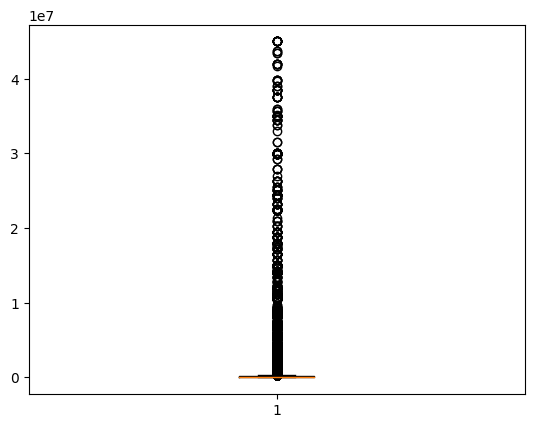

In [154]:
plt.boxplot(games_merged['sales_average'])

(array([2.5564e+04, 4.0500e+02, 1.4700e+02, 1.0300e+02, 5.9000e+01,
        4.4000e+01, 3.4000e+01, 2.5000e+01, 2.1000e+01, 2.1000e+01]),
 array([       0.,  4498500.,  8997000., 13495500., 17994000., 22492500.,
        26991000., 31489500., 35988000., 40486500., 44985000.]),
 <BarContainer object of 10 artists>)

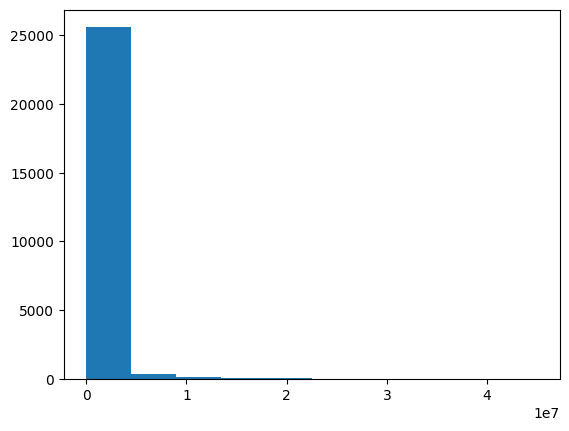

In [155]:
plt.hist(games_merged['sales_average'])

The `sales_average` column is already a calcualted variable from low and high points of owners multiplied by unit price. Since it is a calculated variable, it is binned to different levels of sales. This can also help with business interpretability. Note that it is highly skewed, so `SMOTE` would be necessary later on, when running regression models.

In [156]:
# Feature Engineering 3-2: Bin Sales
# 3-2-1 3 bins (25 and 75th percentiles)

# define cutoff values 
bins = [games_merged['sales_average'].min(), games_merged['sales_average'].describe()[4], games_merged['sales_average'].describe()[6], games_merged['sales_average'].max()]

# define labels
labels = ['low', 'medium', 'high']

# categorize sales_average
games_merged['sales_category'] = pd.cut(games_merged['sales_average'], bins=bins, labels=labels)

sales_category
medium    13344
high       6318
low        4296
Name: count, dtype: int64

## EDA - Top 5 most popular genres

In [160]:
# genre counts
genre_count = {}
for genre in genre_names:
    genre_count[genre] = len(games_merged.loc[games_merged[genre] == 1])

# top 5 genres with most number of games
top_5_genres = [genre[0] for genre in sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:5]]
top_5_genres

['Indie', 'Action', 'Casual', 'Adventure', 'Strategy']

In [201]:
# Sort and normalize the counts
top_5_genres = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:5]
total_counts = len(games_merged)
top_5_genre_counts = {item[0]: item[1]/total_counts for item in top_5_genres}

Text(0.5, 1.0, 'Normalized Number of Games in Top 5 Most Popular Genres')

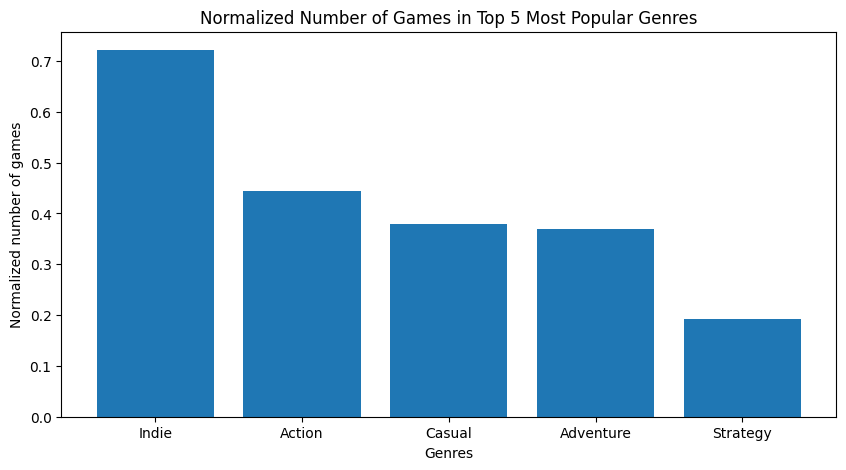

In [203]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(top_5_genre_counts.keys(), top_5_genre_counts.values())
ax.set_xlabel('Genres')
ax.set_ylabel('Normalized number of games')
ax.set_title('Normalized Number of Games in Top 5 Most Popular Genres')

In [169]:
games_merged.loc[games_merged['Indie'] == 1]['sales_category'].value_counts(normalize=True)

sales_category
medium    0.574993
low       0.216861
high      0.208146
Name: proportion, dtype: float64